In [76]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [92]:
def Buy(df: pd.DataFrame, balance: float) -> dict:
    total_market_cap = df['Market Cap'].head(10).sum()
    df['Percent'] = df['Market Cap']/total_market_cap
    
    bag = {}
    balance -= balance*0.001
    for i in range(10):
        if not df['Symbol'][i] == 'STO': 
            bag[df['Symbol'][i]] = balance*df['Percent'][i]/df['Price'][i]
        else:
            bag['BTC'] += balance*df['Percent'][i]/df['Price'][0]
    return bag

In [93]:
def Sell(df: pd.DataFrame, bag: dict) -> float:
    balance = 0
    for symbol in bag.keys():
            balance += bag[symbol]*df[df['Symbol'] == symbol]['Price'].iloc[0]
    balance -= balance*0.001
    return balance

30911.877434784008


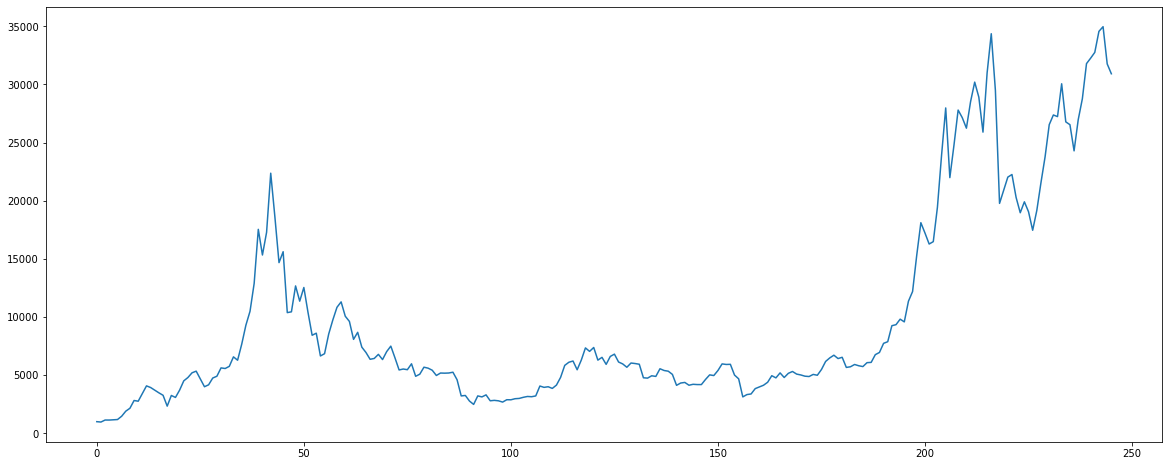

In [94]:
date = datetime.date(2017, 3, 19)
df = pd.read_csv('Data/' + str(date) + '.csv')
balance_progress = [1000]
bag = Buy(df, 1000)
date += datetime.timedelta(days=7)
while date < datetime.date.today():
    df = pd.read_csv('Data/' + str(date) + '.csv')
    balance = Sell(df, bag)
    balance_progress.append(balance)
    bag = Buy(df, balance)
    date += datetime.timedelta(days=7)

print(balance)
fig = plt.figure(figsize=(20,8))
plt.plot(balance_progress)

In [6]:
import pandas as pd
import json
d = pd.read_csv('Data/2017-01-01.csv')
d.drop('Unnamed: 0',axis=1, inplace=True)
d = d.to_dict()

In [8]:
with open('jsondata.json', 'w') as f:
    f.write(json.dumps(d, indent=4))

In [1]:
from DataFetcher import GetHistoricalPriceData

In [2]:
GetHistoricalPriceData('BTCUSDT')

,Open,High,Low,Close,Volume,Close time
0,4261.48,4485.39,3850.00,4086.29,2843.431426,2017-08-20 23:59:59.999000064
1,4069.13,4453.91,3400.00,4310.01,4599.396629,2017-08-27 23:59:59.999000064
2,4310.01,4939.19,4124.54,4509.08,4753.843376,2017-09-03 23:59:59.999000064
3,4505.00,4788.59,3603.00,4130.37,6382.787745,2017-09-10 23:59:59.999000064
4,4153.62,4394.59,2817.00,3699.99,8106.705127,2017-09-17 23:59:59.999000064
...,...,...,...,...,...,...
240,41262.11,46999.00,40467.94,46827.76,315436.150440,2022-03-27 23:59:59.999000064
241,46827.76,48189.84,44200.00,46407.35,312053.159640,2022-04-03 23:59:59.999000064
242,46407.36,47200.00,41868.00,42158.85,268118.291110,2022-04-10 23:59:59.999000064
243,42158.85,42414.71,39200.00,39678.12,259281.048700,2022-04-17 23:59:59.999000064
